In [ ]:
!pip uninstall -y numpy
!pip install numpy==1.23.5

#Restart Runtime after this is done
# Just run it once, then disconnect and delete runtime, then skip this cell, you don't need it anymore

!pip uninstall -y pandas
!pip install pandas==1.5.3 

!pip uninstall -y scikit-learn
!pip install scikit-learn==1.2.0

!pip uninstall -y nltk
!pip install nltk==3.8.1

!pip uninstall -y torch
!pip install torch==1.13.1

# Just run it once, then disconnect and delete runtime, then skip this cell, you don't need it anymore

!pip install pytorch-lightning==1.8.1
!pip install transformers==4.22.2
!pip install datasets==2.9.0 
!pip install sentencepiece==0.1.97
!pip install stanza==1.4.2



Found existing installation: numpy 1.22.4
Uninstalling numpy-1.22.4:
  Successfully uninstalled numpy-1.22.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 85.1 MB/s eta 0:00:00


Found existing installation: pandas 1.5.3
Uninstalling pandas-1.5.3:
  Successfully uninstalled pandas-1.5.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 76.8 MB/s eta 0:00:00


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 105.6 MB/s eta 0:00:00


Found existing installation: nltk 3.8.1
Uninstalling nltk-3.8.1:
  Successfully uninstalled nltk-3.8.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.6 MB/s eta 0:00:00


Found existing installation: torch 2.0.0+cu118
Uninstalling torch-2.0.0+cu118:
  Successfully uninstalled torch-2.0.0+cu118
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 71.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.15.1+cu118 requires torch==2.0.0, but you have torch 1.13.1 which is incompatible.
torchtext 0.15.1 requires torch==2.0.0, but you have torch 1.13.1 which is incompatible.
torchdata 0

In [ ]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aiohttp                       3.8.4
aiosignal                     1.3.1
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
async-timeout                 4.0.2
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
CacheC

In [ ]:
# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
import numpy as np
import re, string
import nltk.data
import nltk
from matplotlib import pyplot as plt
# %matplotlib inline

# Download English 
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

pd.set_option('max_colwidth', None)

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def process_string(text):
  # 1. remove tags
  text = re.sub(re.compile('<.*?>'), ' ', text)
  # 2. remove punctuation and lowercase
  text = re.sub(r'[^\w\s\']',' ', text).lower()
  # 3. remove duplicate spaces
  text = re.sub(' +', ' ', text)
  return text

def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    return " ".join(words)

def preprocess(data):
    #renaming the columns 
    data = data.rename(columns={0:'Sentiment',1:'Category',2:'Subject',3:'Index',4:'Text'})

    # Mark the subject
    data['Text'] = data.apply(lambda x: x['Text'][:int(x.Index.split(':')[0])]+'thisiswherethesubjectissupposedtobe'+x['Text'][int(x.Index.split(':')[1]):],axis=1)

    # preprocess
    data["Text"] = data["Text"].apply(process_string)

    # Separating 2 columns
    data[['Main_Category','Sub_Category']] = data['Category'].str.split('#', 1, expand=True)
    data = data.drop(columns='Category')

    # Label Encoding Sentiment, Category, and Sub-Category
    data['Sentiment'] = data['Sentiment'].apply(lambda x: 1 if x == 'positive' else (0 if x == 'neutral' else -1))
    data['Main_Category_Label'] = data['Main_Category'].apply(lambda x: 1 if x == 'AMBIENCE' else (2 if x == 'FOOD' else (3 if x == 'SERVICE' else (4 if x == 'RESTAURANT' else (5 if x == 'DRINKS' else 6)))))
    data['Sub_Category_Label'] = data['Sub_Category'].apply(lambda x: 1 if x == 'GENERAL' else (2 if x == 'QUALITY' else (3 if x == 'STYLE_OPTIONS' else (4 if x == 'MISCELLANEOUS' else 5))))

    # pre-process Subject column
    data["Subject"] = data["Subject"].apply(process_string)

    # Remove stopwords from Text and Subject
    #data['Text'] = data['Text'].apply(remove_stopwords)
    #data['Subject'] = data['Subject'].apply(remove_stopwords)

    # Changing Index column
    data['Index'] = data.apply(lambda x: str(x['Text'].find('thisiswherethesubjectissupposedtobe'))+':'+str(x['Text'].find('thisiswherethesubjectissupposedtobe')+ len(x['Subject'])), axis = 1)
    data['Text'] = data.apply(lambda x: x['Text'].replace('thisiswherethesubjectissupposedtobe',x['Subject']), axis = 1)
    
    return data

# Get stopwords 
stopwords_ENG = stopwords.words('english')
stop_words = set(stopwords_ENG)

In [ ]:
# Prepare Data
train = pd.read_csv('traindata.csv',sep='	',header=None)

#train = preprocess(train)

test = pd.read_csv('devdata.csv',sep='	',header=None)

#test = preprocess(test)

In [ ]:
train.iloc[[7,   53,   60,   91,  183,  195,  197,  369,  431,  469,  475,  614,  647,  666,  670,  870,  876,  916,  928,  950,  988, 1153,  1233, 1246, 1276, 1388, 1496]]

,0,1,2,3,4
7,negative,SERVICE#GENERAL,service,76:83,"sometimes i get bad food and bad service, sometimes i get good good and bad service."
53,positive,FOOD#QUALITY,food,4:8,The food is a diamond in rough -- the food is delicious and homemade with the perfect balance of herbs and tomatoes.
60,positive,FOOD#QUALITY,lobster,92:99,I have to highly recommend the lobster roll - not to much mayo; you can tell it was a fresh lobster.
91,negative,SERVICE#GENERAL,waitress,19:27,"At this point, the waitress comes over and asks us if everything was okay, I was literally so shocked that I was speechless and didn't say anything, and guess what, the waitress WALKED away."
183,positive,FOOD#QUALITY,good,63:67,"sometimes i get bad food and bad service, sometimes i get good good and bad service."
195,negative,RESTAURANT#PRICES,The Four Seasons,0:16,"The Four Seasons has history and it is a sort of landmark of New York City restaurants, but trust me, they will charge you through the nose just so that you can say ""I've been to the four seasons restaurant""."
197,negative,SERVICE#GENERAL,waitress,4:12,"The waitress, seems to be more concerned of looking good than actually waitressing."
369,positive,RESTAURANT#MISCELLANEOUS,place,85:90,"It was the first place we ate on our first trip to New York, and it will be the last place we stop as we head out of town on our next trip to New York."
431,negative,FOOD#QUALITY,dish,112:116,I've enjoyed 99% of the dishes we've ordered with the only exceptions being the occasional too-authentic-for-me dish (I'm a daring eater but not THAT daring).
469,positive,FOOD#QUALITY,pizza,4:9,"The pizza is delicious - they use fresh mozzarella instead of the cheap, frozen, shredded cheese common to most pizzaria's."


# Old

In [ ]:
"""
# Method 1: bag of words
train = train.drop(columns=['Index','Main_Category','Sub_Category'])
test = test.drop(columns=['Index','Main_Category','Sub_Category'])

count_vect = CountVectorizer(stop_words='english', min_df=5)
# Train
X_train_counts = count_vect.fit_transform(train["Text"])
print("Train shape:", X_train_counts.shape)

# Test
X_test_counts = count_vect.transform(test["Text"])
print("Test shape:", X_test_counts.shape)

# Train
feature_names = count_vect.get_feature_names_out()
X_train_vec = pd.DataFrame(X_train_counts.toarray(), columns = feature_names)
df_train = train.drop('Text', axis = 1).merge(X_train_vec, left_index=True, right_index=True)

# Test
feature_names = count_vect.get_feature_names_out()
X_test_vec = pd.DataFrame(X_test_counts.toarray(), columns = feature_names)
df_test = test.drop('Text', axis = 1).merge(X_test_vec, left_index=True, right_index=True)

# Label Encode Subject
le = LabelEncoder()
df_train['Subject'] = le.fit_transform(df_train['Subject'])
df_test['Subject'] = le.fit_transform(df_test['Subject'])

# -- we maybe need to work on classifier.py and tester.py
# split the dataset into training and testing sets
y_train = df_train['Sentiment']
X_train = df_train.drop('Sentiment', axis = 1)
y_test = df_test['Sentiment']
X_test = df_test.drop('Sentiment', axis = 1)

# train a logistic regression model
model = LogisticRegression(max_iter = 10000)
model.fit(X_train, y_train)

# evaluate the performance of the model on the testing data
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division = True))
"""

Train shape: (1503, 508)
Test shape: (376, 508)
[[ 45   4  49]
 [  3   1  10]
 [ 17   1 246]]
              precision    recall  f1-score   support

          -1       0.69      0.46      0.55        98
           0       0.17      0.07      0.10        14
           1       0.81      0.93      0.86       264

    accuracy                           0.78       376
   macro avg       0.56      0.49      0.51       376
weighted avg       0.75      0.78      0.75       376



In [ ]:
"""
# Method 2: Word Embedding

# a smaller model, faster download and no problems with out of memory
import gensim.downloader as api
wv = api.load('glove-wiki-gigaword-50')

def text_to_vector(Text, wv):
    vectors = []
    for word in Text.split():
        if word in wv: # skip our-of-vocabulary words
            vectors.append(wv[word])
    return np.mean(vectors, axis=0)

X_train_wv = np.zeros((train.shape[0], wv.vectors.shape[1]))
for i, text in enumerate(train["Text"]):
    X_train_wv[i] = text_to_vector(text, wv)

X_test_wv = np.zeros((test.shape[0], wv.vectors.shape[1]))
for i, text in enumerate(test["Text"]):
    X_test_wv[i] = text_to_vector(text, wv)

scaler = StandardScaler()
X_train_wv = scaler.fit_transform(X_train_wv)
X_test_wv = scaler.transform(X_test_wv)

X_train_emb = pd.DataFrame(X_train_wv)
df_train = train.drop('Text', axis = 1).merge(X_train_emb, left_index=True, right_index=True)

X_test_emb = pd.DataFrame(X_test_wv)
df_test = test.drop('Text', axis = 1).merge(X_test_emb, left_index=True, right_index=True)

# All column names as string
df_train.columns = df_train.columns.astype(str)
df_test.columns = df_test.columns.astype(str)

# Label Encode Subject
le = LabelEncoder()
df_train['Subject'] = le.fit_transform(df_train['Subject'])
df_test['Subject'] = le.fit_transform(df_test['Subject'])

# split the dataset into training and testing sets
y_train = df_train['Sentiment']
X_train = df_train.drop('Sentiment', axis = 1)
y_test = df_test['Sentiment']
X_test = df_test.drop('Sentiment', axis = 1)

# train a logistic regression model
model = LogisticRegression(max_iter = 10000)
model.fit(X_train, y_train)

# evaluate the performance of the model on the testing data
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division = True))
"""

[==================================================] 100.0% 66.0/66.0MB downloaded
[[ 40   2  56]
 [  4   0  10]
 [ 19   1 244]]
              precision    recall  f1-score   support

          -1       0.63      0.41      0.50        98
           0       0.00      0.00      0.00        14
           1       0.79      0.92      0.85       264

    accuracy                           0.76       376
   macro avg       0.47      0.44      0.45       376
weighted avg       0.72      0.76      0.73       376



In [ ]:
"""
# Method 3: Recurrent Neural Network with Tokenization

from transformers import GPT2Tokenizer 
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

X_train_tok = []
for text in train["Text"]:
    X_train_tok.append(tokenizer.encode(text))

X_test_tok = []
for text in test["Text"]:
    X_test_tok.append(tokenizer.encode(text))

print(X_train_tok[:3])

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

_ = plt.hist([len(s) for s in X_train_tok], 100)
plt.xlabel("Length")
plt.ylabel("Number of sequences")

X_train_tok = pd.DataFrame(X_train_tok)
X_test_tok = pd.DataFrame(X_test_tok)
df_train = train.drop('Text', axis = 1).merge(X_train_tok, left_index=True, right_index=True)
df_test = test.drop('Text', axis = 1).merge(X_test_tok, left_index=True, right_index=True)

# Label Encode Subject
le = LabelEncoder()
df_train['Subject'] = le.fit_transform(df_train['Subject'])
df_test['Subject'] = le.fit_transform(df_test['Subject'])

df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

# split the dataset into training and testing sets
y_train = df_train['Sentiment']
X_train = df_train.drop('Sentiment', axis = 1)
y_test = df_test['Sentiment']
X_test = df_test.drop('Sentiment', axis = 1)

X_train_tok = X_train.to_numpy()
X_test_tok = X_test.to_numpy()

max_seq_len = 500

# clip sequences
X_train_tok = [s[:max_seq_len] for s in X_train_tok]
X_test_tok = [s[:max_seq_len] for s in X_test_tok]

# create masks
mask_train = [[1]*len(s)+[0]*(max_seq_len-len(s)) for s in X_train_tok]
mask_test = [[1]*len(s)+[0]*(max_seq_len-len(s)) for s in X_test_tok]

# pad sequences
# X_train_tok = [s+[0]*(max_seq_len-len(s)) for s in X_train_tok]
# X_test_tok = [s+[0]*(max_seq_len-len(s)) for s in X_test_tok]

train_dset = torch.utils.data.TensorDataset(torch.tensor(X_train_tok, 
                                                         dtype=torch.long), 
                                            torch.tensor(y_train, 
                                                         dtype=torch.long), 
                                            torch.tensor(mask_train, 
                                                         dtype=torch.float))

test_dset = torch.utils.data.TensorDataset(torch.tensor(X_test_tok, 
                                                        dtype=torch.long), 
                                          torch.tensor(y_test, 
                                                        dtype=torch.long), 
                                          torch.tensor(mask_test, 
                                                        dtype=torch.float))

batch_size = 128

train_loader = torch.utils.data.DataLoader(train_dset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=2
                         )

test_loader = torch.utils.data.DataLoader(test_dset,
                          batch_size=batch_size,
                          shuffle=False,
                          num_workers=2
                         )

# demo
x, y, m = next(iter(train_loader))
print(x.shape, y.shape, m.shape)
# x.shape: [B, L], y.shape: [L], mask.shape: [B, L]
print(x)
print(y)
print(m)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class RNNClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size, \
                 num_rec_layers=1, rec_layer=nn.LSTM):
        super(RNNClassifier, self).__init__()
        # define all layers we need, 
        # their parameters will be initialized automatically
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.rnn1 = rec_layer(embedding_dim, hidden_dim, batch_first=True)
        self.num_rec_layers = num_rec_layers
        if self.num_rec_layers == 2:
            self.rnn2 = rec_layer(hidden_dim, hidden_dim, batch_first=True)
            # this code with if is for simplicity, 
            # normally one would use torch.nn.ModuleList
        self.hidden2label = nn.Linear(hidden_dim, 1)
    
    def forward(self, sentences, mask):
        # sentences shape: [B, L], mask shape: [B, L]
        embedding = self.word_embeddings(sentences) # shape: [B, L, DE]
        out, hidden = self.rnn1(embedding) # out shape: [B, L, DH]
        if self.num_rec_layers == 2:
            out, hidden = self.rnn2(out) # out shape: [B, L, DH]
        out = (out*mask[:, :, None]).mean(dim=1) # shape: [B, DH]
        res = self.hidden2label(out) # shape: [B, 1]
        return torch.sigmoid(res)

# create a particular instance of the model 
rnn = RNNClassifier(128, 128, tokenizer.vocab_size)
rnn.to(device)
"""


'\n# Method 3: Recurrent Neural Network with Tokenization\n\nfrom transformers import GPT2Tokenizer \ntokenizer = GPT2Tokenizer.from_pretrained("gpt2")\n\nX_train_tok = []\nfor text in train["Text"]:\n    X_train_tok.append(tokenizer.encode(text))\n\nX_test_tok = []\nfor text in test["Text"]:\n    X_test_tok.append(tokenizer.encode(text))\n\nprint(X_train_tok[:3])\n\nimport torch\nimport torch.nn as nn\nimport torch.nn.functional as F\nimport torch.optim as optim\n\n_ = plt.hist([len(s) for s in X_train_tok], 100)\nplt.xlabel("Length")\nplt.ylabel("Number of sequences")\n\nX_train_tok = pd.DataFrame(X_train_tok)\nX_test_tok = pd.DataFrame(X_test_tok)\ndf_train = train.drop(\'Text\', axis = 1).merge(X_train_tok, left_index=True, right_index=True)\ndf_test = test.drop(\'Text\', axis = 1).merge(X_test_tok, left_index=True, right_index=True)\n\n# Label Encode Subject\nle = LabelEncoder()\ndf_train[\'Subject\'] = le.fit_transform(df_train[\'Subject\'])\ndf_test[\'Subject\'] = le.fit_transfo

# Roberta

In [ ]:
def roberta_preprocess(data):
    #renaming the columns 
    data = data.rename(columns={0:'Sentiment',1:'Category',2:'Subject',3:'Index',4:'Text'})

    # Lowercase
    data["Text"] = data["Text"].str.lower()
    data["Subject"] = data["Subject"].str.lower()

    # Special Token
    data[['Start','End']] = data['Index'].str.split(':', 1, expand=True)
    data['Start'] = data['Start'].astype(int)
    data['End'] = data['End'].astype(int)
    data['Text'] = data.apply(lambda x: x['Text'][:x['Start']]+'\"'+x['Text'][x['Start']:x['End']]+'\"'+x['Text'][x['End']:],axis=1)

    data = data.drop(columns=['Index','Start','End'])

    # Separating 2 columns
    data['Category'] = data['Category'].str.lower()
    data[['Main_Category','Sub_Category']] = data['Category'].str.split('#', 1, expand=True)
    data['Sub_Category'] = data['Sub_Category'].str.replace('_',' ')
    data['Category'] = data['Main_Category'] + ' ' + data['Sub_Category']

    data['Text'] = data['Text'] + ' <s> ' + data['Category'] + ' </s>'
    #data = data.drop(columns='Category')

    # Label Encoding Sentiment, Category, and Sub-Category
    data['Sentiment'] = data['Sentiment'].apply(lambda x: 2 if x == 'positive' else (1 if x == 'neutral' else 0))
    #data['Main_Category_Label'] = data['Main_Category'].apply(lambda x: 1 if x == 'AMBIENCE' else (2 if x == 'FOOD' else (3 if x == 'SERVICE' else (4 if x == 'RESTAURANT' else (5 if x == 'DRINKS' else 6)))))
    #data['Sub_Category_Label'] = data['Sub_Category'].apply(lambda x: 1 if x == 'GENERAL' else (2 if x == 'QUALITY' else (3 if x == 'STYLE_OPTIONS' else (4 if x == 'MISCELLANEOUS' else 5))))

    return data

In [39]:
# Prepare Data
train = pd.read_csv('traindata.csv',sep='	',header=None)

train = roberta_preprocess(train)

test = pd.read_csv('devdata.csv',sep='	',header=None)

test = roberta_preprocess(test)

<ipython-input-2-7d4681bcbeef>:10: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data[['Start','End']] = data['Index'].str.split(':', 1, expand=True)
<ipython-input-2-7d4681bcbeef>:19: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data[['Main_Category','Sub_Category']] = data['Category'].str.split('#', 1, expand=True)
<ipython-input-2-7d4681bcbeef>:10: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data[['Start','End']] = data['Index'].str.split(':', 1, expand=True)
<ipython-input-2-7d4681bcbeef>:19: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data[['Main_Category','Sub_Category']] = data['Category'].str.split('#', 1, expand=True)


In [40]:
from transformers import RobertaTokenizer, RobertaModel, get_linear_schedule_with_warmup, get_cosine_schedule_with_warmup

tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

train['Input'] = train['Text'].apply(lambda x: tokenizer(x, padding='max_length', max_length=100)['input_ids'])
train['Mask'] = train['Text'].apply(lambda x: tokenizer(x, padding='max_length', max_length=100)['attention_mask'])

test['Input'] = test['Text'].apply(lambda x: tokenizer(x, padding='max_length', max_length=100)['input_ids'])
test['Mask'] = test['Text'].apply(lambda x: tokenizer(x, padding='max_length', max_length=100)['attention_mask'])

In [41]:
X = train[['Input','Mask']]
y = np.array(train['Sentiment'].tolist())
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_test = test[['Input','Mask']]
y_test = np.array(test['Sentiment'].tolist())

In [42]:
train_dataset = torch.utils.data.TensorDataset(torch.tensor(np.array(X_train['Input'].tolist()), dtype=torch.long),
                                               torch.tensor(np.array(X_train['Mask'].tolist()), dtype=torch.long),
                                               torch.tensor(y_train, dtype=torch.long))

val_dataset = torch.utils.data.TensorDataset(torch.tensor(np.array(X_val['Input'].tolist()), dtype=torch.long),
                                             torch.tensor(np.array(X_val['Mask'].tolist()), dtype=torch.long),
                                             torch.tensor(y_val, dtype=torch.long))

test_dataset = torch.utils.data.TensorDataset(torch.tensor(np.array(X_test['Input'].tolist()), dtype=torch.long),
                                              torch.tensor(np.array(X_test['Mask'].tolist()), dtype=torch.long),
                                              torch.tensor(y_test, dtype=torch.long))

train_dataloader = torch.utils.data.DataLoader(train_dataset,batch_size=64,shuffle=True,num_workers=2)

val_dataloader = torch.utils.data.DataLoader(val_dataset,batch_size=32,shuffle=False,num_workers=2)

test_dataloader = torch.utils.data.DataLoader(test_dataset,batch_size=32,shuffle=False,num_workers=2)

In [43]:
device = torch.device('cuda')

Roberta = RobertaModel.from_pretrained("roberta-base").to(device)
'''
for param in Roberta.parameters():
    param.requires_grad = False
'''
class model(nn.Module):

    def __init__(self, Roberta):
        super().__init__()

        self.roberta = Roberta.to(device)
        self.l1 = nn.Linear(in_features=768, out_features=768)
        #self.relu = nn.ReLU(inplace=True)
        self.drop = nn.Dropout(p=0.1)
        self.l2 = nn.Linear(in_features=768, out_features=3)

    def forward(self, x, attention_mask):

        x = self.roberta(x,attention_mask)
        x = x.pooler_output
        x = self.l1(x)
        #x = self.relu(x)
        x = self.drop(x)
        x = self.l2(x)

        return x

basic_model = model(Roberta).to(device)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [45]:
def train(model, loss_fcn, device, optimizer, max_epochs, train_dataloader, val_dataloader):

    epoch_list = []
    scores_list = []
    lowest_loss = 1

    # loop over epochs
    for epoch in range(max_epochs):
        model.train()
        losses = []
        # loop over batches
        for i, data in enumerate(train_dataloader):
            optimizer.zero_grad()
            inputs, mask, labels = data
            outputs = model(inputs.to(device),mask.to(device))
            # compute the loss
            loss = loss_fcn(outputs, labels.to(device))
            # optimizer step
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
        loss_data = np.array(losses).mean()
        print("Epoch {:05d} | Loss: {:.4f}".format(epoch, loss_data))
        
        if epoch % 5 == 0:
            # evaluate the model on the validation set
            # computes the f1-score
            score_list_batch = []

            model.eval()
            with torch.no_grad():
                for i, batch in enumerate(val_dataloader):
                    inputs, mask, labels = batch
                    output = model(inputs.to(device),mask.to(device))
                    loss_test = loss_fcn(output, labels.to(device))
                    predict = torch.argmax(output,axis=1)
                    score = accuracy_score(labels.cpu().numpy(), predict.cpu().numpy())
                    score_list_batch.append(score)

            score = np.array(score_list_batch).mean()
            print("Accuracy-Score: {:.4f}".format(score))
            scores_list.append(score)
            epoch_list.append(epoch)

    return epoch_list, scores_list

In [46]:
### Max number of epochs
max_epochs = 41

### DEFINE LOSS FUNCTION
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = torch.FloatTensor(class_weights).to(device)

loss_fcn = nn.CrossEntropyLoss(weight=class_weights)

### DEFINE OPTIMIZER
optimizer = torch.optim.AdamW(basic_model.parameters(), lr=2e-5)
scheduler = get_linear_schedule_with_warmup(optimizer,0,max_epochs*len(train_dataloader))
epoch_list, basic_model_scores = train(basic_model, loss_fcn, device, optimizer, max_epochs, train_dataloader, val_dataloader)

Epoch 00000 | Loss: 1.1003
Accuracy-Score: 0.7252
Epoch 00001 | Loss: 1.0958
Epoch 00002 | Loss: 0.8633
Epoch 00003 | Loss: 0.8291
Epoch 00004 | Loss: 0.6310
Epoch 00005 | Loss: 0.4135
Accuracy-Score: 0.8079
Epoch 00006 | Loss: 0.2854
Epoch 00007 | Loss: 0.2172
Epoch 00008 | Loss: 0.1588
Epoch 00009 | Loss: 0.1340
Epoch 00010 | Loss: 0.1104
Accuracy-Score: 0.8829
Epoch 00011 | Loss: 0.1073
Epoch 00012 | Loss: 0.1141
Epoch 00013 | Loss: 0.1426
Epoch 00014 | Loss: 0.1028
Epoch 00015 | Loss: 0.0713
Accuracy-Score: 0.8923
Epoch 00016 | Loss: 0.0533
Epoch 00017 | Loss: 0.0613
Epoch 00018 | Loss: 0.0708
Epoch 00019 | Loss: 0.0943
Epoch 00020 | Loss: 0.0599
Accuracy-Score: 0.8829
Epoch 00021 | Loss: 0.0377
Epoch 00022 | Loss: 0.0323
Epoch 00023 | Loss: 0.0228
Epoch 00024 | Loss: 0.0180
Epoch 00025 | Loss: 0.0147
Accuracy-Score: 0.8986
Epoch 00026 | Loss: 0.0141
Epoch 00027 | Loss: 0.0219
Epoch 00028 | Loss: 0.0146
Epoch 00029 | Loss: 0.0164
Epoch 00030 | Loss: 0.0263
Accuracy-Score: 0.8954
Ep

Basic Model : Accuracy Score on the test set: 0.8793


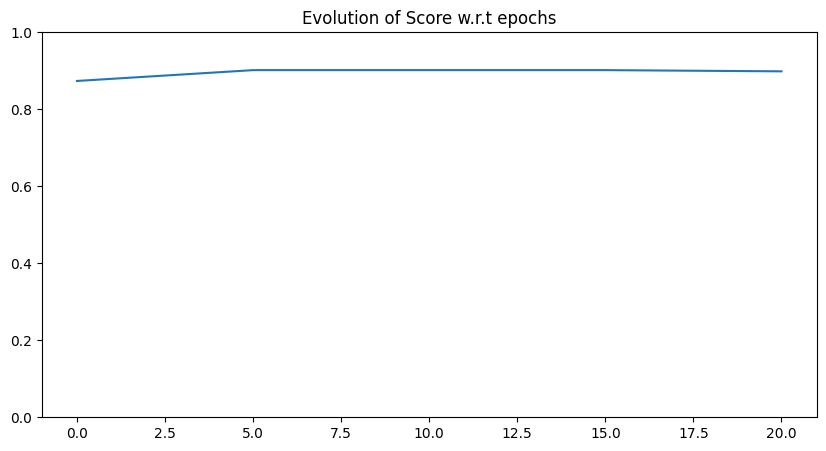

In [36]:
### F1-SCORE ON TEST DATASET
score_list_batch = []

basic_model.eval()

for i, batch in enumerate(test_dataloader):
    inputs, mask, labels = batch
    output = basic_model(inputs.to(device),mask.to(device))
    loss_test = loss_fcn(output, labels.to(device))
    predict = torch.argmax(output,axis=1)
    score = accuracy_score(labels.cpu().numpy(), predict.cpu().numpy())
    score_list_batch.append(score)

score = np.array(score_list_batch).mean()
print("Basic Model : Accuracy Score on the test set: {:.4f}".format(score))

### PLOT EVOLUTION OF F1-SCORE W.R.T EPOCHS
def plot_score(epoch_list, scores) :
    plt.figure(figsize=[10,5])
    plt.plot(epoch_list, scores)
    plt.title("Evolution of Score w.r.t epochs")
    plt.ylim([0.0, 1.0])
    plt.show()
    
plot_score(epoch_list, basic_model_scores)

In [ ]:
from collections import Counter
Counter(y_test)

Counter({2: 264, 0: 98, 1: 14})

In [38]:
torch.save(basic_model.state_dict(), 'best_model.pt')

In [ ]:
basic_model